# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the MIND-small dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Mean Reciprocal Rank (MRR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to fianl rankings.

## 1. Setup

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem, t
from IPython.display import display, HTML

# Loading Data
mind_small_user_metrics = pd.read_csv('../outputs/mind-small-user-metrics.csv.gz')
mind_small_user_metrics.head()

,user_id,recommender,NDCG@5,NDCG@10,MRR,RBO@5,RBO@10,personalized
0,bf5bb199-a039-5d82-812b-a7f69df5788a,nrms,0.0,0.0,0.0,0.409510,0.651322,True
1,bf5bb199-a039-5d82-812b-a7f69df5788a,mmr,0.0,0.0,0.0,0.216469,0.315367,True
2,bf5bb199-a039-5d82-812b-a7f69df5788a,pfar,0.0,0.0,0.0,0.409510,0.651322,True
3,bf5bb199-a039-5d82-812b-a7f69df5788a,topic-cali,0.0,0.0,0.0,0.409510,0.651322,True
4,bf5bb199-a039-5d82-812b-a7f69df5788a,softmax,0.0,0.0,0.0,0.129816,0.298712,True


## 2. Visualizations
To evaluate the plot, look for higher values in the bars. Higher values indicate better performance in terms of the respective metric. Error bars show the variability of the results. The exact values of the error bars are provided in the summary table below.

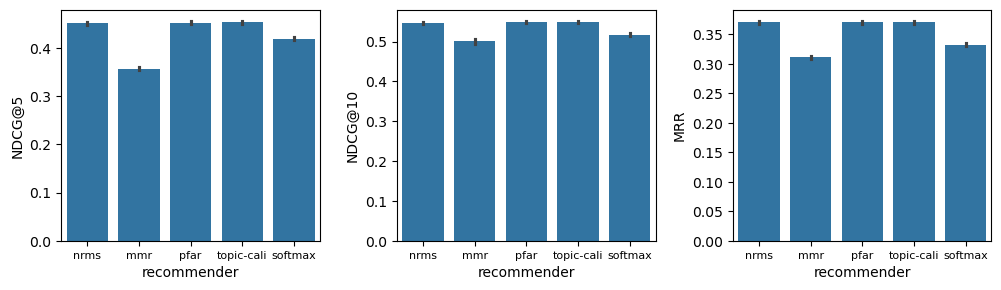

In [7]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 3, 1)
sns.barplot(data=mind_small_user_metrics, x='recommender', y='NDCG@5')
plt.xticks(fontsize=8)

plt.subplot(1, 3, 2)
sns.barplot(data=mind_small_user_metrics, x='recommender', y='NDCG@10')
plt.xticks(fontsize=8)

plt.subplot(1, 3, 3)
sns.barplot(data=mind_small_user_metrics, x='recommender', y='MRR')
plt.xticks(fontsize=8)

plt.show()

In [8]:
# Function to calculate CI
def calculate_ci(data, confidence=0.95):
    se = sem(data)
    h = se * t.ppf((1 + confidence) / 2, len(data) - 1)
    return (np.mean(data) - h, np.mean(data) + h)

metrics = ['NDCG@5', 'NDCG@10', 'MRR']

html_tables = ""

# Generate summary tables
for metric in metrics:
    summary_table = mind_small_user_metrics.groupby('recommender')[metric].agg(
        Mean='mean'
    ).reset_index()

    summary_table['Mean (95% CI)'] = summary_table.apply(
        lambda row: (
            f"{row['Mean']:.4f}<br>"
            f"({calculate_ci(mind_small_user_metrics[mind_small_user_metrics['recommender'] == row['recommender']][metric])[0]:.4f} "
            f"- {calculate_ci(mind_small_user_metrics[mind_small_user_metrics['recommender'] == row['recommender']][metric])[1]:.4f})"
        ),
        axis=1
    )

    summary_table = summary_table[['recommender', 'Mean (95% CI)']]

    # Add to html_tables string for side by side display
    html_tables+= f"<div style='display: inline-block; margin-right: 50px;'><h3>Summary Table for {metric}</h3>{summary_table.to_html(index=False, escape=False)}</div>"

display(HTML(html_tables))

recommender,Mean (95% CI)
mmr,0.3570(0.3531 - 0.3608)
nrms,0.4511(0.4477 - 0.4546)
pfar,0.4524(0.4490 - 0.4559)
softmax,0.4192(0.4157 - 0.4226)
topic-cali,0.4529(0.4494 - 0.4564)
recommender,Mean (95% CI)
mmr,0.5003(0.4947 - 0.5060)
nrms,0.5463(0.5429 - 0.5497)
pfar,0.5491(0.5458 - 0.5525)
softmax,0.5174(0.5140 - 0.5208)


### 2. 2 Ranking Overlap Metrics

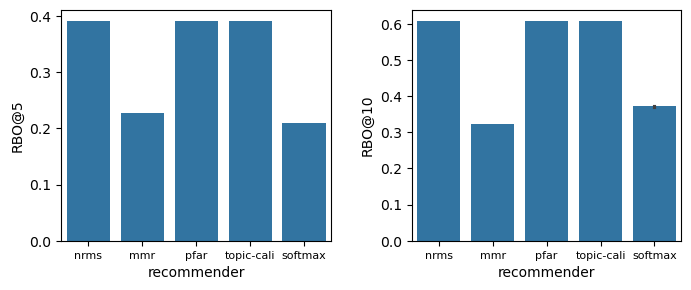

In [9]:
plt.figure(figsize=(8, 3))

plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
sns.barplot(data=mind_small_user_metrics, x='recommender', y='RBO@5')
plt.xticks(fontsize=8)

plt.subplot(1, 2, 2)
sns.barplot(data=mind_small_user_metrics, x='recommender', y='RBO@10')
plt.xticks(fontsize=8)

plt.show()

In [10]:
metrics = ['RBO@5', 'RBO@10']

html_tables = ""

for metric in metrics:
    summary_table = mind_small_user_metrics.groupby('recommender')[metric].agg(
        Mean='mean'
    ).reset_index()

    summary_table['Mean (95% CI)'] = summary_table.apply(
        lambda row: (
            f"{row['Mean']:.4f}<br>"
            f"({calculate_ci(mind_small_user_metrics[mind_small_user_metrics['recommender'] == row['recommender']][metric])[0]:.4f} "
            f"- {calculate_ci(mind_small_user_metrics[mind_small_user_metrics['recommender'] == row['recommender']][metric])[1]:.4f})"
        ),
        axis=1
    )

    summary_table = summary_table[['recommender', 'Mean (95% CI)']]

    html_tables+= f"<div style='display: inline-block; margin-right: 50px;'><h3>Summary Table for {metric}</h3>{summary_table.to_html(index=False, escape=False)}</div>"

display(HTML(html_tables))

recommender,Mean (95% CI)
mmr,0.2270(0.2265 - 0.2274)
nrms,0.3911(0.3906 - 0.3917)
pfar,0.3911(0.3906 - 0.3917)
softmax,0.2096(0.2088 - 0.2104)
topic-cali,0.3911(0.3906 - 0.3917)
recommender,Mean (95% CI)
mmr,0.3227(0.3220 - 0.3235)
nrms,0.6076(0.6067 - 0.6085)
pfar,0.6076(0.6067 - 0.6085)
softmax,0.3720(0.3710 - 0.3731)
